In [1]:
#Построить график продаж по дням и неделям год к году

In [1]:
import pandas as pd
import numpy as np
import sqlite3
from datetime import datetime as dt 
import seaborn as sns

In [2]:
con = sqlite3.connect("hw.db")
df = pd.read_sql('SELECT * FROM t', con, index_col='index')  

In [3]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['isoYear'] = df['date'].dt.isocalendar().year
df['week'] = df['date'].dt.isocalendar().week
df['startOfWeek'] = df['date'] - df['date'].dt.weekday*pd.Timedelta(days=1)
df['doy'] = df['date'].dt.dayofyear 

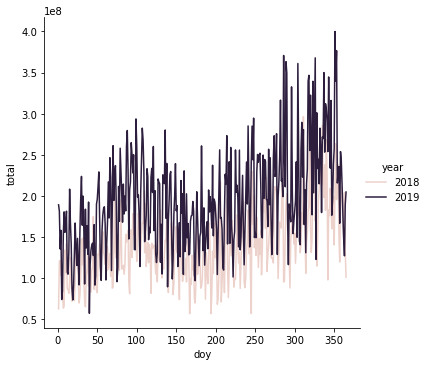

In [4]:
df_k = df.groupby(['year', 'doy'],as_index=False).sum()
g = sns.relplot(x='doy', y='total', hue='year', kind='line', data=df_k)

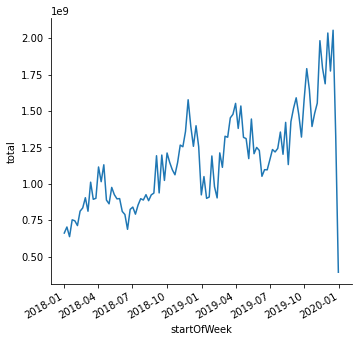

In [31]:
df_t1 = df.groupby(['startOfWeek'],as_index=False).sum()
g = sns.relplot(x='startOfWeek', y='total', kind='line', data=df_t1)
g.fig.autofmt_xdate()

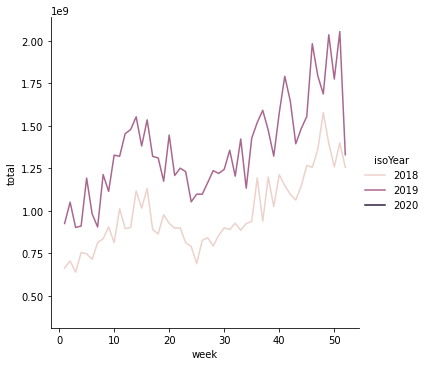

In [12]:
df_t2 = df.groupby(['isoYear','week'],as_index=False).sum()
g = sns.relplot(x='week', y='total', hue='isoYear', kind='line', data=df_t2)

In [6]:
#Посчитать продажи в разных разрезах и ответить на вопросы

In [7]:
#В каком городе самые большие продажи? 

In [13]:
k = df.groupby(['city'], as_index=False)[['total']].sum()

In [14]:
k.sort_values(by = 'total')

,city,total
3,3,1027740334
2,2,5036594148
1,1,10112530277
0,0,106020942477


In [8]:
#Какой товар продаётся лучше всего?

In [9]:
k1 = df.groupby('city').sum().assign(avg = lambda x: x.total/x.qty)['avg']

In [18]:
k1

city
0    1666.585541
1    1661.012579
2    1671.191163
3    1646.325882
Name: avg, dtype: float64

In [10]:
k2 = df.groupby(['item'], as_index=False)[['total']].sum()

In [12]:
k2.sort_values(by = 'total', ascending=False)

,item,total
256,257,108625685
93,94,108144176
1069,1070,107868650
1137,1138,107527852
143,144,107267958
...,...,...
46,47,86712732
240,241,86691330
1026,1027,86478800
1190,1191,86385401


In [ ]:
# Как распределена средняя цена проданного товара? 

c:\users\julia\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


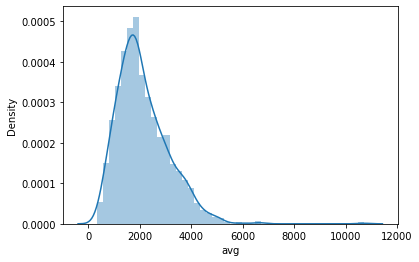

In [24]:
m = sns.distplot(df.groupby('item').sum().assign(avg = lambda x: x.total/x.qty)['avg'])

In [13]:
#Какой товар лучше всего продаётся в декабре?

In [15]:
df['month'] = df['date'].dt.month
df_m = df[(df['month'] == 12)]

In [27]:
df_m

,date,city,item,qty,total,year,isoYear,week,startOfWeek,day,month
index,,,,,,,,,,,
718727,2018-12-01,0,1,74,107300,2018,2018,48,2018-11-26,335,12
718728,2018-12-01,1,1,3,4350,2018,2018,48,2018-11-26,335,12
718729,2018-12-01,0,2,322,232484,2018,2018,48,2018-11-26,335,12
718730,2018-12-01,1,2,40,28880,2018,2018,48,2018-11-26,335,12
718731,2018-12-01,2,2,9,6498,2018,2018,48,2018-11-26,335,12
...,...,...,...,...,...,...,...,...,...,...,...
1715748,2019-12-31,1,1241,9,16110,2019,2020,1,2019-12-30,365,12
1715749,2019-12-31,2,1241,6,10740,2019,2020,1,2019-12-30,365,12
1715750,2019-12-31,0,1242,149,159430,2019,2020,1,2019-12-30,365,12


In [16]:
df_m = df_m.groupby(['item'], as_index=False)[['total']].sum()
df_m.sort_values(by = 'total', ascending=False)

,item,total
454,455,18137825
210,211,17000290
867,868,16922160
512,513,16608480
1018,1019,16527593
...,...,...
763,764,5592825
48,49,5572134
628,629,5510318
1203,1204,5384800


In [ ]:
#А какой товар лучше всего продаётся в июне?

In [17]:
df_m = df[(df['month'] == 6)]
df_m = df_m.groupby(['item'], as_index=False)[['total']].sum()
df_m.sort_values(by = 'total', ascending=False)

,item,total
1150,1151,9925080
1147,1148,9897705
301,302,9896215
847,848,9856536
64,65,9771020
...,...,...
905,906,4326672
699,700,4277538
429,430,4273770
591,592,4256241


In [18]:
#Проанализировать группы товаров и ответить на вопросы
#Сколько групп с разной сезонностью можно выделить в товарах

In [7]:
df_t

,0,1,2,3,s
item,,,,,
1,0.171071,0.325347,0.221100,8189600,37040250
2,0.212660,0.216113,0.335802,14601006,43481006
3,0.195676,0.220122,0.337245,14489472,42964272
4,0.172390,0.324962,0.229028,8850055,38641799
5,0.210921,0.203310,0.350045,15501989,44285673
...,...,...,...,...,...
1238,0.191717,0.219236,0.343045,15007720,43748564
1239,0.204436,0.224357,0.319386,13782028,43151602
1240,0.201007,0.226954,0.352946,15072875,42705936


In [5]:
df_t = df[df['date'].dt.year==2018].copy()
df_t.loc[:,'qrt'] = 0
df_t.loc[df_t['date'].dt.month >= 4,'qrt'] = 1
df_t.loc[df_t['date'].dt.month >= 7,'qrt'] = 2
df_t.loc[df_t['date'].dt.month >= 10,'qrt'] = 3
df_t = df_t[['item','qrt','total']].groupby(['item','qrt']).sum().unstack()
df_t.columns = [0, 1, 2, 3]
df_t['s'] = df_t[0] + df_t[1] + df_t[2] + df_t[3]
df_t[0] = df_t[0]/df_t['s']
df_t[1] = df_t[1]/df_t['s']
df_t[2] = df_t[2]/df_t['s']
df_t[2] = df_t[3]/df_t['s']
sns.relplot(data=df_t, x=0, y=1)
sns.relplot(data=df_t, x=2, y=3)
sns.relplot(data=df_t, x=0, y=2) 

TypeError: object of type 'int' has no len()

In [ ]:
#Какое соотношение продаж по ним?

In [19]:
df_t.loc[:, 'tp'] = 'I'
df_t.loc[df_t[2] > 0.29, 'tp'] = 'II'
df_t.loc[df_t[2] > 0.37, 'tp'] == 'III'
df_k = pd.DataFrame(df_t['tp'], index=df_t.index).reset_index()

KeyError: 2

In [6]:
df_mm = df.merge(df_k, on='item').groupby(['tp', 'startOfWeek'], as_index=False).sum()
g = sns.relplot(data=df_mm, x='startOfWeek', y='total', hue='tp', kind='line')
g.fig.autofmt_xdate()

NameError: name 'df_mm' is not defined

In [40]:
df_mm = df.merge(df_k, on='item').groupby(['tp', 'city']).sum()[['total']].unstack()
df_mm.columns = [0,1,2,3]
ss = df_mm.sum(axis=1)
for c in df_mm.columns:
    df_mm[c] = df_mm(c)/ss
    df_mm = df_mm.stack().reset_index()
    df_mm.columns = ['tp', 'city', 'total']
sns.catplot(data=df_mm, x='city', y='total', hue='tp', kind='bar')

TypeError: 'DataFrame' object is not callable